# Chapter 6: Holidays

## Adding default country holidays

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('../data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)

c:\users\gregr\appdata\local\programs\python\python38\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
model.add_country_holidays(country_name='US')

16:23:20 - cmdstanpy - INFO - Chain [1] start processing
16:23:20 - cmdstanpy - INFO - Chain [1] done processing


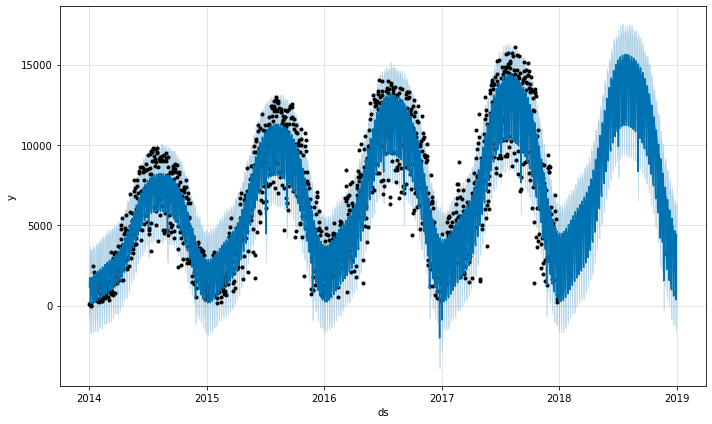

In [3]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

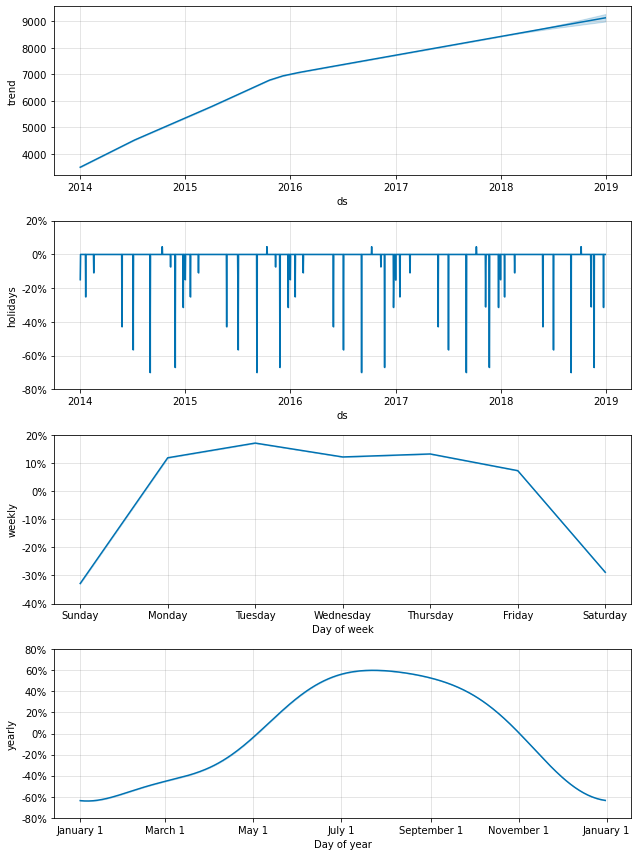

In [4]:
fig2 = model.plot_components(forecast)
plt.show()

In [5]:
model.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [6]:
def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]

pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in model.train_holiday_names]})

,holiday,effect
0,New Year's Day,-0.150108
1,Martin Luther King Jr. Day,-0.251991
2,Washington's Birthday,-0.109250
3,Memorial Day,-0.429368
4,Independence Day,-0.566422
5,Labor Day,-0.701107
6,Columbus Day,0.045949
7,Veterans Day,-0.074190
8,Thanksgiving,-0.670827
9,Christmas Day,-0.314894


## Adding default state/province holidays

In [7]:
from prophet.make_holidays import make_holidays_df

In [8]:
year_list = df['ds'].dt.year.unique().tolist()
# Identify the final year, as an integer, and increase it by 1
year_list.append(year_list[-1] + 1)
holidays = make_holidays_df(year_list=year_list,
                            country='US',
                            state='IL')

In [9]:
holidays.head()

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-01-18,Martin Luther King Jr. Day
2,2016-02-12,Lincoln's Birthday
3,2016-02-15,Washington's Birthday
4,2016-03-07,Casimir Pulaski Day


## Creating multi-day holidays

In [10]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

16:23:23 - cmdstanpy - INFO - Chain [1] start processing
16:23:24 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
holidays = make_holidays_df(year_list=year_list, country='US')

In [12]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(['2014-11-28',
                                                   '2015-11-27',
                                                   '2016-11-25',
                                                   '2017-11-24',
                                                   '2018-11-23'])})
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(['2014-12-24',
                                                    '2015-12-24',
                                                    '2016-12-24',
                                                    '2017-12-24',
                                                    '2018-12-24'])})

In [13]:
holidays = pd.concat([holidays, black_friday, christmas_eve]
                    ).sort_values('ds').reset_index(drop=True)

In [14]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

16:23:25 - cmdstanpy - INFO - Chain [1] start processing
16:23:26 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
holidays = make_holidays_df(year_list=year_list, country='US')

taste_of_chicago = pd.DataFrame({'holiday': 'Taste of Chicago',
                                 'ds': pd.to_datetime(['2014-07-09',
                                                       '2015-07-08',
                                                       '2016-07-06',
                                                       '2017-07-05',
                                                       '2018-07-11']),
                                 'lower_window': 0,
                                 'upper_window': 4})
holidays = pd.concat([holidays, taste_of_chicago]
                    ).sort_values('ds').reset_index(drop=True)

In [16]:
holidays.head(10)

,ds,holiday,lower_window,upper_window
0,2014-01-01,New Year's Day,NaN,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN,NaN
2,2014-02-17,Washington's Birthday,NaN,NaN
3,2014-05-26,Memorial Day,NaN,NaN
4,2014-07-04,Independence Day,NaN,NaN
5,2014-07-09,Taste of Chicago,0.0,4.0
6,2014-09-01,Labor Day,NaN,NaN
7,2014-10-13,Columbus Day,NaN,NaN
8,2014-11-11,Veterans Day,NaN,NaN
9,2014-11-27,Thanksgiving,NaN,NaN


In [17]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

16:23:28 - cmdstanpy - INFO - Chain [1] start processing
16:23:28 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
forecast[forecast['ds'].isin(['2018-07-11',
                              '2018-07-12',
                              '2018-07-13',
                              '2018-07-14',
                              '2018-07-15']
                            )][['ds',
                                'Taste of Chicago']]

,ds,Taste of Chicago
1649,2018-07-11,-0.036177
1650,2018-07-12,0.020332
1651,2018-07-13,0.069295
1652,2018-07-14,0.015054
1653,2018-07-15,0.021748


In [19]:
from prophet.plot import plot_forecast_component

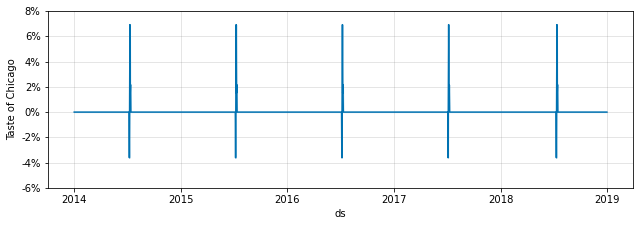

In [20]:
fig3 = plot_forecast_component(model,
                               forecast,
                               'Taste of Chicago',
                               figsize=(10.5, 3.25))
plt.show()

## Regularizing holidays

### Global holiday regularization

16:23:30 - cmdstanpy - INFO - Chain [1] start processing
16:23:30 - cmdstanpy - INFO - Chain [1] done processing


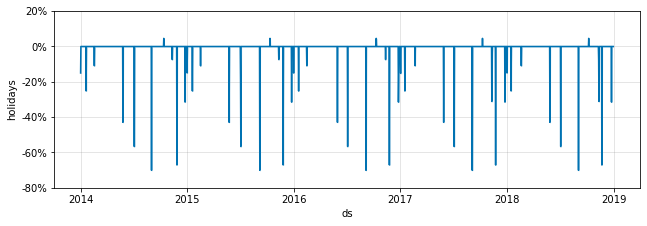

In [21]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=10)
model.add_country_holidays(country_name='US')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = plot_forecast_component(model,
                              forecast,
                              'holidays',
                              figsize=(10.5, 3.25))
plt.show()

16:23:32 - cmdstanpy - INFO - Chain [1] start processing
16:23:32 - cmdstanpy - INFO - Chain [1] done processing


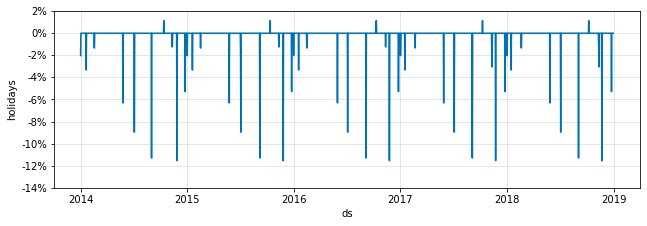

In [22]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=0.05)
model.add_country_holidays(country_name='US')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = plot_forecast_component(model,
                              forecast,
                              'holidays',
                              figsize=(10.5, 3.25))
plt.show()

### Individual holiday regularization

In [23]:
holidays = make_holidays_df(year_list=year_list, country='US')

In [24]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(['2014-11-28',
                                                   '2015-11-27',
                                                   '2016-11-25',
                                                   '2017-11-24',
                                                   '2018-11-23']),
                             'prior_scale': 1})
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(['2014-12-24',
                                                    '2015-12-24',
                                                    '2016-12-24',
                                                    '2017-12-24',
                                                    '2018-12-24']),
                              'prior_scale': 1})

taste_of_chicago = pd.DataFrame({'holiday': 'Taste of Chicago',
                                 'ds': pd.to_datetime(['2014-07-09',
                                                       '2015-07-08',
                                                       '2016-07-06',
                                                       '2017-07-05',
                                                       '2018-07-11']),
                                 'lower_window': 0,
                                 'upper_window': 4,
                                 'prior_scale': 0.1})

In [25]:
holidays = pd.concat([holidays,
                      black_friday,
                      christmas_eve,
                      taste_of_chicago]
                    ).sort_values('ds').reset_index(drop=True)

In [26]:
holidays.head(16)

,ds,holiday,prior_scale,lower_window,upper_window
0,2014-01-01,New Year's Day,NaN,NaN,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN,NaN,NaN
2,2014-02-17,Washington's Birthday,NaN,NaN,NaN
3,2014-05-26,Memorial Day,NaN,NaN,NaN
4,2014-07-04,Independence Day,NaN,NaN,NaN
5,2014-07-09,Taste of Chicago,0.1,0.0,4.0
6,2014-09-01,Labor Day,NaN,NaN,NaN
7,2014-10-13,Columbus Day,NaN,NaN,NaN
8,2014-11-11,Veterans Day,NaN,NaN,NaN
9,2014-11-27,Thanksgiving,NaN,NaN,NaN


In [27]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays,
                holidays_prior_scale=10)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

16:23:35 - cmdstanpy - INFO - Chain [1] start processing
16:23:35 - cmdstanpy - INFO - Chain [1] done processing
